**Importing the library Numpy,Pandas,Seaborn & matplotlib **




In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


**Global configurations for Matplotlib and pandas to improve the display and formatting of visualizations and dataframes**

In [ ]:
#Matplotlib,Float,Column maximum upto 100,Maximum column width 500,Frame flexibility,Frame width flexibilty

plt.rcParams["figure.figsize"] = (10, 6)
pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.expand_frame_repr', True)
pd.set_option('display.width', 2000)


In [ ]:
#Importing Dataset

file_path='/content/sample_data/raw_house_data - raw_house_data.csv'
df=pd.read_csv(file_path)
print("File Path:",df.head(5))
rows, columns = df.shape
print("Rows:",rows)
print("Columns:",columns)

File Path:         MLS  sold_price  zipcode  longitude  latitude  lot_acres    taxes  year_built  bedrooms  bathrooms  sqrt_ft  garage                                             kitchen_features  fireplaces                floor_covering  HOA
0  21530491  5300000.00    85637    -110.38     31.36    2154.00  5272.00        1941        13      10.00 10500.00    0.00                      Dishwasher, Freezer, Refrigerator, Oven        6.00            Mexican Tile, Wood    0
1  21529082  4200000.00    85646    -111.05     31.59    1707.00 10422.36        1997         2       2.00  7300.00    0.00                                 Dishwasher, Garbage Disposal        5.00          Natural Stone, Other    0
2   3054672  4200000.00    85646    -111.04     31.59    1707.00 10482.00        1997         2       3.00      NaN     NaN                   Dishwasher, Garbage Disposal, Refrigerator        5.00    Natural Stone, Other: Rock  NaN
3  21919321  4500000.00    85646    -111.04     31.65     636

In [ ]:
# Spliting the Kitchen features and floor covering

df2=df['kitchen_features'].str.split(',', expand=True).rename(columns = lambda x: "kitchen_f"+str(x+1));
df3=df['floor_covering'].str.split(',', expand=True).rename(columns = lambda x: "floor_c"+str(x+1))

print("Spilt The column\n",df.head(5))
print(df.shape)
print(df.info())
print(df.describe())
print(df2.head(5))
print(df3.head(5))

In [ ]:
# Drop the column floor_covering & kitchen_features

df=df.drop(['floor_covering'], axis=1)
df=df.drop(['kitchen_features'], axis=1)
df.columns

Index(['MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres', 'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage', 'fireplaces', 'HOA'], dtype='object')

In [ ]:
# Find the House age & dropped the Year build column

df["House_Age"]=pd.Timestamp.now().year-df.year_built
df=df.drop(['year_built'], axis=1)

print("House Age Calculation:",df.head(5))
df.info()

In [ ]:
# After inspecting (df.info()) Column Bathroom,Sqft,garage,fireplaces & HOA as objects, Converted to Numeric value

df['bathrooms'] = pd.to_numeric(df['bathrooms'],errors = 'coerce')
df['sqrt_ft'] = pd.to_numeric(df['sqrt_ft'],errors = 'coerce')
df['garage'] = pd.to_numeric(df['garage'],errors = 'coerce')
df['fireplaces'] = pd.to_numeric(df['fireplaces'],errors = 'coerce')
df['HOA'] = pd.to_numeric(df['HOA'],errors = 'coerce')

print("Convert to Numeric:",df.head(5))
print(df2.info())
print(df3.info())


In [ ]:
# Fill with missing and non Numeric data for DF2 & DF3

df2.fillna(0) # fill null value with zero

df2=df2.replace(regex={r'\D+': 1})  #instead of string values, replace as 1
df2=df2.fillna(0)
df2.head(5)




In [ ]:
# Calculating the number of features

df2['Kitchen_Sum']=df2.sum(axis=1)
print(df2.head(5))

df3.fillna(0)  #fill null value with zero

df3=df3.replace(regex={r'\D+': 1});    #instead of string values, to write 1
df3=df3.fillna(0)

df3['Floor_Sum']=df3.sum(axis=1)
df3=df3['Floor_Sum']

print(df3.head(5))


In [ ]:
# Concatenate DF2 & DF3 dataframe

df_new= pd.concat([df2,df3], axis=1)
df_new.head(5)

df_final_merge= pd.concat([df,df_new], axis=1)
df_final_merge.head(5);
df=df_final_merge
df.head(5)





In [ ]:
# checking Unique column
df['MLS'].nunique()

5000

In [ ]:
#Setting row index
df.set_index('MLS',inplace=True)
df.info()


In [ ]:
#Number of null values of each column
df.isnull().sum()

In [ ]:
df = df.fillna(np.nan)
df.isnull().sum()
df.columns

Index(['sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres', 'taxes', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage', 'fireplaces', 'HOA', 'House_Age', 'kitchen_f1', 'kitchen_f2', 'kitchen_f3', 'kitchen_f4', 'kitchen_f5', 'kitchen_f6', 'kitchen_f7', 'kitchen_f8', 'kitchen_f9', 'kitchen_f10', 'kitchen_f11', 'kitchen_f12', 'kitchen_f13', 'kitchen_f14', 'kitchen_f15', 'Kitchen_Sum', 'Floor_Sum'], dtype='object')

In [ ]:
df.dropna(subset= ["lot_acres","garage","bathrooms","sqrt_ft","fireplaces"],inplace=True,axis=0);
#to drop rows that are with None values from specific columns

In [ ]:
rows, columns = df.shape
print("Rows:",rows)
print("Columns:",columns)

Rows: 4940
Columns: 30


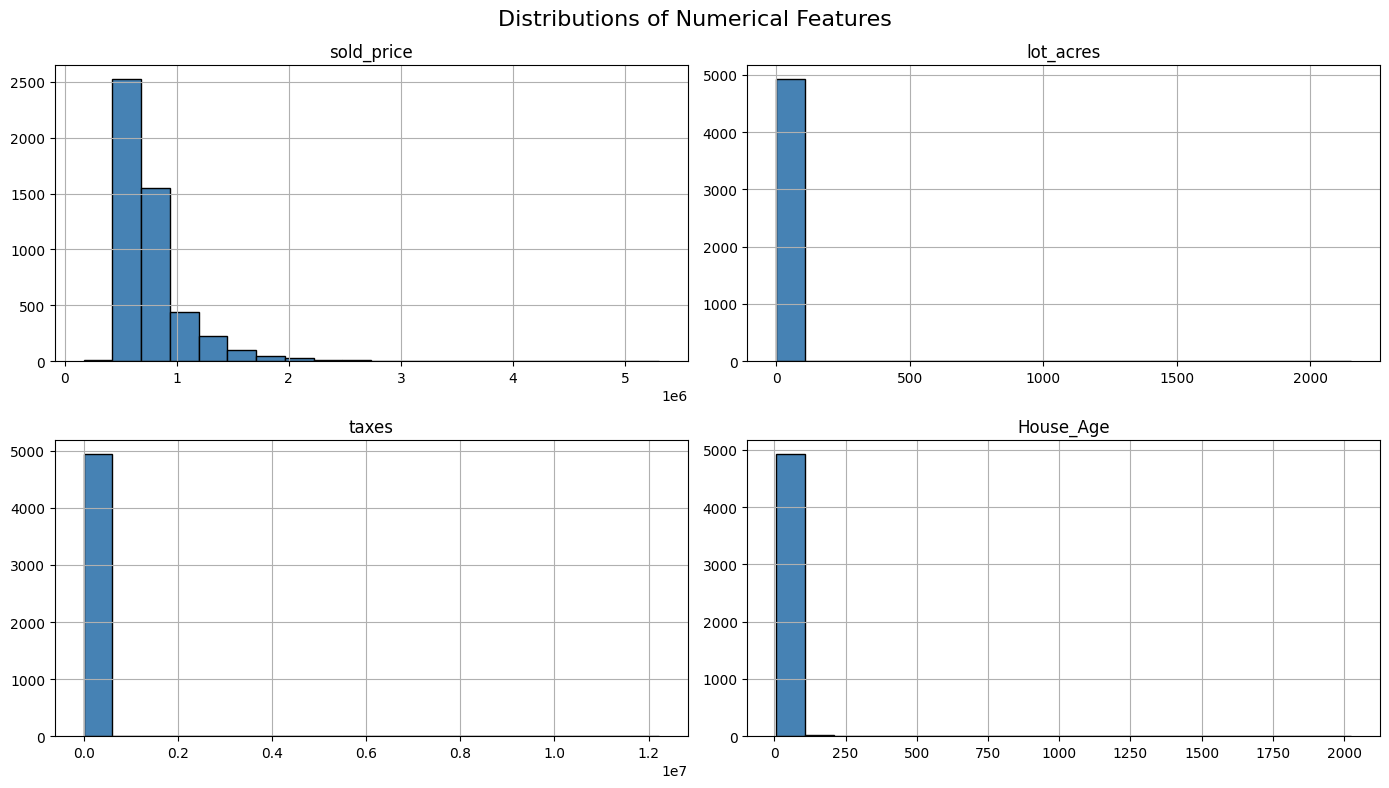

In [ ]:
# Visualize distributions of numerical data
numerical_cols = ['sold_price', 'lot_acres', 'taxes', 'House_Age']
df[numerical_cols].hist(bins=20, figsize=(14, 8), color='steelblue', edgecolor='black')
plt.suptitle("Distributions of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()




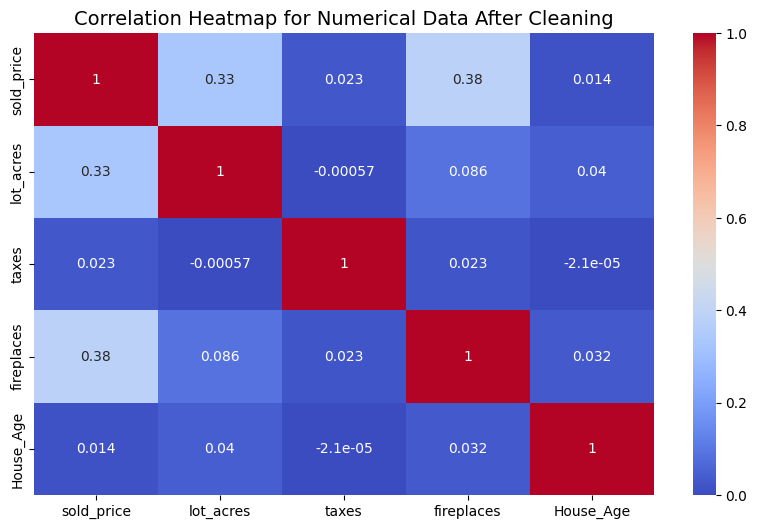

In [ ]:
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap for Numerical Data After Cleaning", fontsize=14)
plt.show()

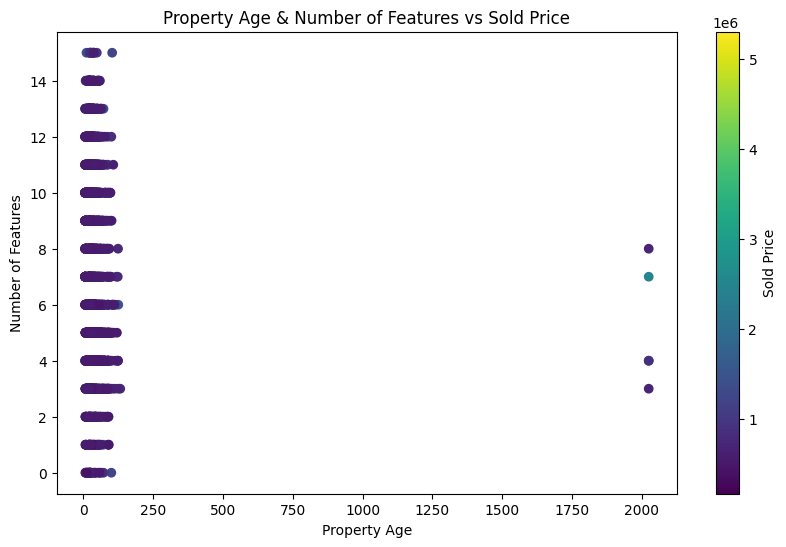

In [ ]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['House_Age'], df['Kitchen_Sum'], c=df['sold_price'], cmap='viridis')
plt.colorbar(scatter, label='Sold Price')
plt.title('Property Age & Number of Features vs Sold Price')
plt.xlabel('Property Age')
plt.ylabel('Number of Features')
plt.show()